# Orders - Multivariate Regression of  the `review_score`

In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ You are strongly advised to:
* 💾 download the solution for yesterday's optional `distance_seller_customer` function if you didn't have time to code it
* 👥 copy-paste it into your `olist/orders.py` file



👇 First things first, import the `orders` dataset

In [104]:
from olist.utils import haversine_distance
from olist.order import Order
# YOUR CODE HERE
orders=Order().get_training_data(with_distance_seller_customer =True)
orders

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72,18.063837
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76,856.292580
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22,514.130333
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20,1822.800366
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72,30.174037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,5,1,1,72.00,13.08,69.481037
95876,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,0,4,1,1,174.90,20.10,474.098245
95877,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,5,1,1,205.99,65.02,968.051192
95878,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,2,2,1,359.98,81.18,370.146853


Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

<AxesSubplot:>

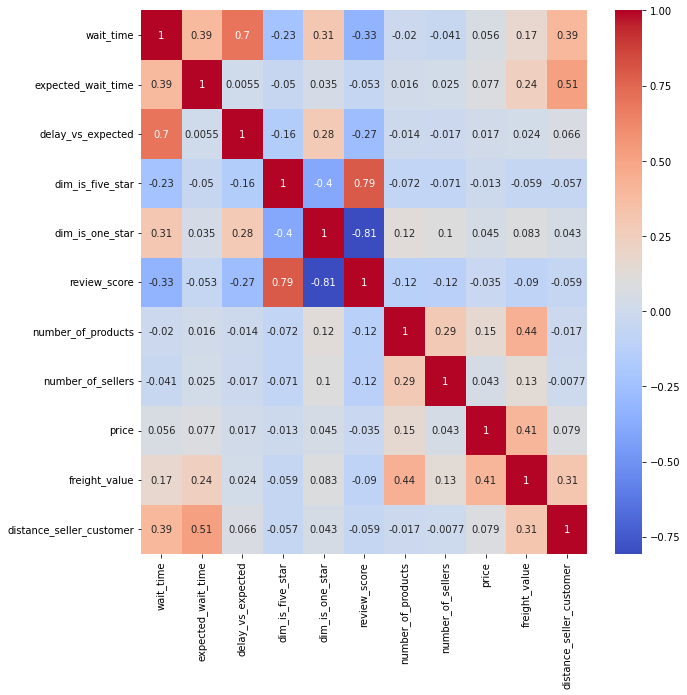

In [105]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True,
            annot_kws={"size": 10})

In [111]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.385628,0.702597,-0.234101,0.305577,-0.334036,-0.019754,-0.040702,0.055638,0.167284,0.394982
expected_wait_time,0.385628,1.000000,0.005519,-0.050333,0.034842,-0.052525,0.015735,0.024884,0.076606,0.238748,0.513563
delay_vs_expected,0.702597,0.005519,1.000000,-0.156735,0.284706,-0.272361,-0.013653,-0.017162,0.016632,0.023887,0.066069
dim_is_five_star,-0.234101,-0.050333,-0.156735,1.000000,-0.396354,0.791749,-0.072270,-0.070536,-0.012762,-0.058773,-0.056566
dim_is_one_star,0.305577,0.034842,0.284706,-0.396354,1.000000,-0.807758,0.119848,0.102241,0.044660,0.082778,0.043185
review_score,-0.334036,-0.052525,-0.272361,0.791749,-0.807758,1.000000,-0.123340,-0.117017,-0.034538,-0.090014,-0.059147
number_of_products,-0.019754,0.015735,-0.013653,-0.072270,0.119848,-0.123340,1.000000,0.288734,0.153551,0.438056,-0.017308
number_of_sellers,-0.040702,0.024884,-0.017162,-0.070536,0.102241,-0.117017,0.288734,1.000000,0.042986,0.133580,-0.007704
price,0.055638,0.076606,0.016632,-0.012762,0.044660,-0.034538,0.153551,0.042986,1.000000,0.410129,0.079356
freight_value,0.167284,0.238748,0.023887,-0.058773,0.082778,-0.090014,0.438056,0.133580,0.410129,1.000000,0.314197


In [116]:
##R-squared R2 the coefficient of determination, 
#also spelled coëfficient, denoted R² or r² and pronounced "R squared", 
#is the proportion of the variation in the dependent variable that is predictable from the independent variable
orders.corr()["review_score"]["delay_vs_expected"]**2

0.07418026878003622

📈 Using `seaborn`, plot a `regression line` of the `review_score` vs. the `delay_vs_expected`.

Do it once with a sub-`sample` of the population, and once with the `entire population`.

<AxesSubplot:xlabel='review_score', ylabel='delay_vs_expected'>

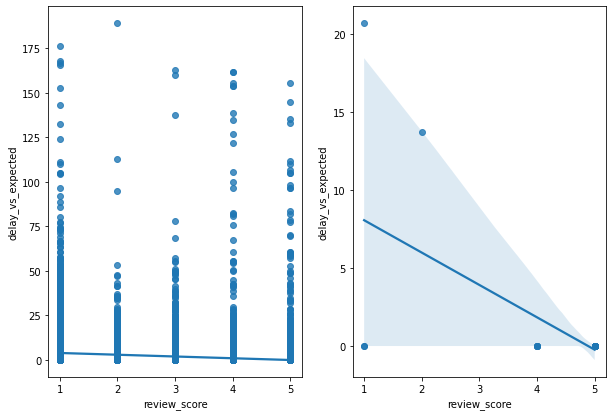

In [117]:
#entire population.
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
sns.regplot(x="review_score",y="delay_vs_expected",data=orders,ci=95)

# sub-sample
plt.subplot(2,2,2)
sns.regplot(x="review_score",y="delay_vs_expected",data=orders.sample(30,random_state=6),ci=95)


## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals`

***Model 1***:

<AxesSubplot:xlabel='review_score', ylabel='wait_time'>

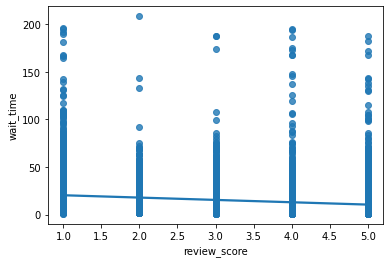

In [135]:
# Model1：ordinary least squares (OLS)
# that minimizes residual sum of square
import statsmodels.formula.api as smf
sns.regplot(x="review_score",y="wait_time",data=orders)

In [132]:
model1=smf.ols(formula="review_score ~wait_time",data=orders).fit()
model1

In [136]:
#R-squared how corellated
model1.rsquared

0.11157977934831409

In [137]:
# individual regression coefficients

print(model1.params)
#1 delay review score -0.07516
#intercept delay 0 intercept 4.2

Intercept    4.723650
wait_time   -0.045402
dtype: float64


In [138]:
model1.summary()
#95% ci is shown???

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:09:39   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    727.904      0.000       4.711       4.736
wait_time     -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

<AxesSubplot:xlabel='review_score', ylabel='delay_vs_expected'>

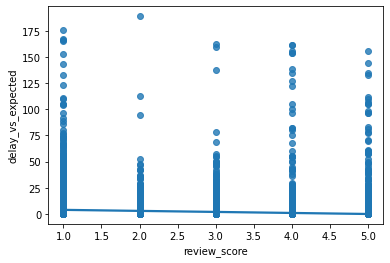

In [142]:
# YOUR CODE HERE
import statsmodels.formula.api as smf
sns.regplot(x="review_score",y="delay_vs_expected",data=orders)


In [146]:
# YOUR CODE HERE
import statsmodels.formula.api as smf
model2=smf.ols(formula="review_score ~delay_vs_expected",data=orders).fit()
model2

In [147]:
print(model2.rsquared)

0.07418026878003114


In [148]:
print(model2.params)

Intercept            4.212135
delay_vs_expected   -0.075165
dtype: float64


In [149]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7681.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:25:05   Log-Likelihood:            -1.5639e+05
No. Observations:               95872   AIC:                         3.128e+05
Df Residuals:                   95870   BIC:                         3.128e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2121      0.004   1041.192      0.000       4.204       4.220
delay_vs_expected    -0.0752      0.001    -87.644      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20662.535   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49770.507
Skew:                          -1.203   Prob(JB):                         0.00
Kurtosis:                       5.582   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [153]:
# OLS model model3 where both wait_time and delay_vs_expected are the features (independent variables), and review_score is the target (dependent variable)

OLS_model = smf.ols(formula="review_score~wait_time+delay_vs_expected",data=orders).fit()
OLS_model.rsquared

0.11438193690841836

In [154]:
OLS_model.params
#partial correlation coefficients.

Intercept            4.650219
wait_time           -0.038298
delay_vs_expected   -0.020530
dtype: float64

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓Can you notice the difference with the **simple regression** coeffients computed with *seaborn* above? 

❓What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


> YOUR ANSWER HERE

<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ Let's try to add more features to our regression to improve the explainability of the linear regression.

👉 Create a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Do not create **data leaks**: do not add features that are directly derived from the `review_score`
- ⚠️ Do not add two features perfectly colinear with each other
- ⚖️  Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ won't be in the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

<AxesSubplot:>

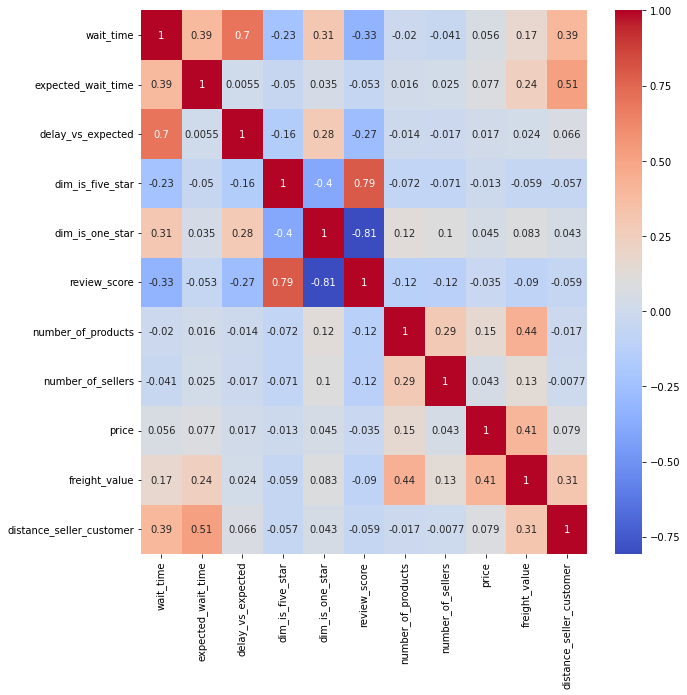

In [159]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True,
            annot_kws={"size": 10})

In [161]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.385628,0.702597,-0.234101,0.305577,-0.334036,-0.019754,-0.040702,0.055638,0.167284,0.394982
expected_wait_time,0.385628,1.000000,0.005519,-0.050333,0.034842,-0.052525,0.015735,0.024884,0.076606,0.238748,0.513563
delay_vs_expected,0.702597,0.005519,1.000000,-0.156735,0.284706,-0.272361,-0.013653,-0.017162,0.016632,0.023887,0.066069
dim_is_five_star,-0.234101,-0.050333,-0.156735,1.000000,-0.396354,0.791749,-0.072270,-0.070536,-0.012762,-0.058773,-0.056566
dim_is_one_star,0.305577,0.034842,0.284706,-0.396354,1.000000,-0.807758,0.119848,0.102241,0.044660,0.082778,0.043185
review_score,-0.334036,-0.052525,-0.272361,0.791749,-0.807758,1.000000,-0.123340,-0.117017,-0.034538,-0.090014,-0.059147
number_of_products,-0.019754,0.015735,-0.013653,-0.072270,0.119848,-0.123340,1.000000,0.288734,0.153551,0.438056,-0.017308
number_of_sellers,-0.040702,0.024884,-0.017162,-0.070536,0.102241,-0.117017,0.288734,1.000000,0.042986,0.133580,-0.007704
price,0.055638,0.076606,0.016632,-0.012762,0.044660,-0.034538,0.153551,0.042986,1.000000,0.410129,0.079356
freight_value,0.167284,0.238748,0.023887,-0.058773,0.082778,-0.090014,0.438056,0.133580,0.410129,1.000000,0.314197


❓ What features would you like to consider ?

In [176]:
# review score over dim_is_five_star and one star
model4 = smf.ols(formula="review_score~dim_is_five_star+wait_time+number_of_products",data=orders).fit()
model4.rsquared

0.655458384085036

In [177]:
model4.params

Intercept             3.466238
dim_is_five_star      1.958706
wait_time            -0.021763
number_of_products   -0.173564
dtype: float64

⚖️ Standardize your features.

*Do you remember why we need to perform this operation before running a `Multivariate regression` ?*

<details>
    <summary>- 💡 Answer 💡-</summary>

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if you have a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

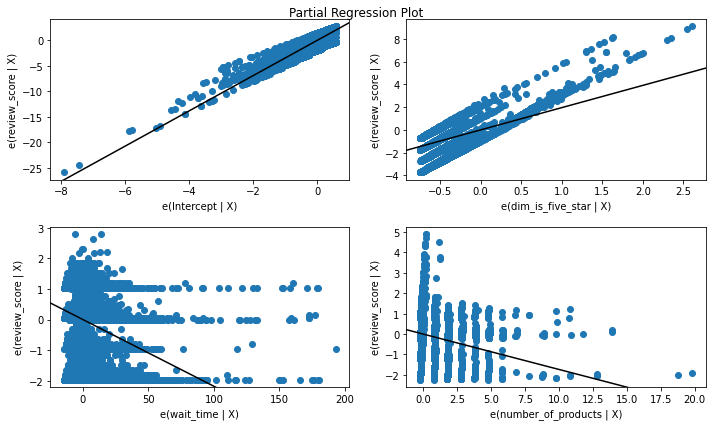

In [178]:
# YOUR CODE HERE
import statsmodels.api as sm
fig = plt.figure(figsize=(10,6))
fig=sm.graphics.plot_partregress_grid(model4,fig=fig)

👉 Create your `model4` and train it.

In [180]:
# YOUR CODE HERE
predicted_yvalue=model4.predict(orders[["dim_is_five_star","wait_time","number_of_products"]])
predicted_yvalue
#Y is target
#other explanating value

0        3.109068
1        2.992735
2        5.046933
3        4.963918
4        5.188835
           ...   
95875    5.072531
95876    2.809672
95877    4.710365
95878    2.747258
95879    5.084364
Length: 95872, dtype: float64

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [182]:
# YOUR CODE HERE
sns.barplot(orders.corr())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<details>
    <summary>- 💡Explanations 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [199]:
# YOUR CODE HERE
residual=predicted_yvalue - orders["review_score"]
residual

0       -0.890932
1       -1.007265
2        0.046933
3       -0.036082
4        0.188835
           ...   
95875    0.072531
95876   -1.190328
95877   -0.289635
95878    0.747258
95879    0.084364
Length: 95872, dtype: float64

Text(0.5, 0, 'predicted_yvalue')

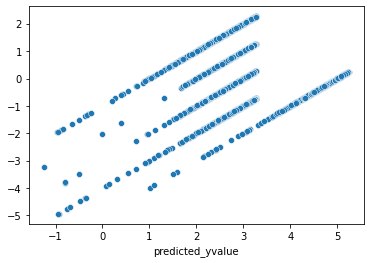

In [200]:
sns.scatterplot(x=predicted_yvalue,y=residual)
plt.xlabel("predicted_yvalue")

🧮 Compute the associated RMSE. 

In [204]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error
import math

MSE=np.square(residual).mean()
RMSE=math.sqrt(MSE)
RMSE


0.7543275987295085

📊 Plot the `residuals` in a histogram.

<AxesSubplot:ylabel='Count'>

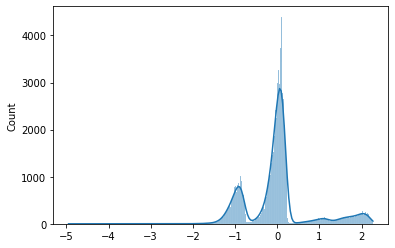

In [186]:
sns.histplot(residual,kde=True,edgecolor="w")

In [0]:
# YOUR CODE HERE

❓ Can you guess why the residual distplot has such a strange shape? 

*Hint:*<br/>
👉 Plot, on the same graph, both the distribution of the `review_score` and the distribution of the`predicted_review_score`.

In [0]:
# YOUR CODE HERE

📈 Actually, using `seaborn`, we could have already plote a `regression line` of the `review_score` vs. the `delay_vs_expected`

Do it once with a sub-`sample` of the population, and once with the `entire population`.

In [0]:
# YOUR CODE HERE

☝️ You can see that it is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 In next session, you will discover a new model: the `Logistic Regression` which, despite its name, is a `Classification Algorithm` 

☝️ So in the end, our model is not so great, for two reasons:
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `rewiew_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.

🏁 Great job! 

💾 Don't forget to *save*, *commit* and *push* this notebook when you are done!